In [86]:
import matplotlib.pyplot as plt
import glob,re
import numpy as np

TimelineHandler,inOutboundDisplay,MobileDisplay

found files :
C:\Users\H299664\Desktop\plot\valgrind_TimelineHandler.2020-02-27-15-30-02-UTC.log
C:\Users\H299664\Desktop\plot\valgrind_TimelineHandler.2020-02-27-15-47-09-UTC.log
C:\Users\H299664\Desktop\plot\valgrind_TimelineHandler.2020-02-27-23-01-00-UTC.log


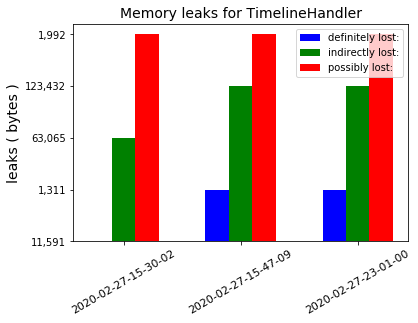


found files :
C:\Users\H299664\Desktop\plot\valgrind_inOutboundDisplay.2020-02-27-15-30-00-UTC.log
C:\Users\H299664\Desktop\plot\valgrind_inOutboundDisplay.2020-02-27-15-47-07-UTC.log
C:\Users\H299664\Desktop\plot\valgrind_inOutboundDisplay.2020-02-27-23-00-58-UTC.log


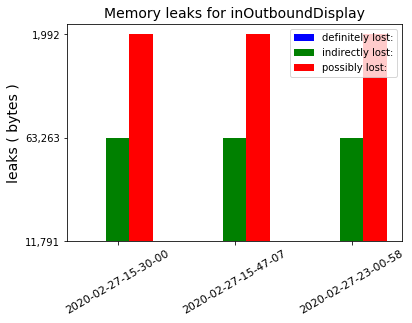


found files :
C:\Users\H299664\Desktop\plot\valgrind_MobileDisplay.2020-02-27-15-30-00-UTC.log
C:\Users\H299664\Desktop\plot\valgrind_MobileDisplay.2020-02-27-15-47-08-UTC.log
C:\Users\H299664\Desktop\plot\valgrind_MobileDisplay.2020-02-27-23-00-59-UTC.log


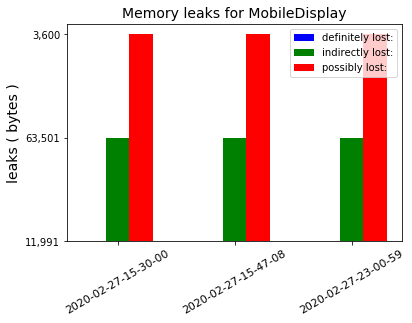

In [151]:
class MemoryLeaks:

    def __init__(self):
        self.leaksTypes = ["definitely lost:", "indirectly lost:", "possibly lost:"]
        self.filesName = []
        self.leakslist = []
        self.files = []
    
    def findAllFiles(self, loc):
        '''
            This function returns the list of all 
            files found at the location loc, e.g 
            location "C:\\Users\\H299664\\Desktop\\plot\\*.log"
        '''
        
        self.files = glob.glob(loc)
        
        print("\nfound files :")
        for file in self.files:
            print( file )
        
        if len(self.files) is 0:
            print('no file found! Please enter the correct module name.')
    
    def listLeaks(self):
        '''
            listLeaks(): creates a list of list where the row is the
            files and column is the leak type
        '''
        if files is 0:
            print('no file is given!!!')
            return None
        
        for file in self.files:
            # to get the all type of losses from one file
            templist = []
            
            f = open(file,'r')
            # regex to get name from the file 
            fileName = re.search(r'([0-9]+-){5}[0-9]+', file)
            
            self.filesName.append(fileName.group())
            for line in f:
                if self.leaksTypes[0] in line:
                    temp = line.split(" ")
                    templist = [temp[-5]]
                elif self.leaksTypes[1] in line:
                    temp = line.split(" ")
                    templist.append(temp[-5])
                elif self.leaksTypes[2] in line:
                    temp = line.split(" ")
                    templist.append(temp[-5])
            f.close()
            self.leakslist.append(templist)
    
    def plot_bar(self):
        '''
            This function plots the bar chart with
            date and time stamp at the bottom and bytes
            leaked at y-axis
        '''
        if len(self.leakslist) == 0:
            print('no leak found!!!')
            return None
        
        # list of leaks
        Leaks = np.array(self.leakslist) 
        # this is to index files increasing time order
        index = np.arange(len(Leaks))
        ax = plt.subplot(111)

        rect1 = ax.bar(index-0.2, Leaks[:,0], width=0.2, color='b', align='center')
        rect2 = ax.bar(index, Leaks[:,1], width=0.2, color='g', align='center')
        rect3 = ax.bar(index+0.2, Leaks[:,2], width=0.2, color='r', align='center')
        ax.legend( (rect1[0], rect2[0], rect3[0]), (self.leaksTypes[0], self.leaksTypes[1], self.leaksTypes[2]) )

        #plt.xlabel('files', size=14)
        plt.ylabel('leaks ( bytes )', size=14)
        plt.xticks(index, self.filesName, size=11, rotation=30)
        plt.title("Memory leaks for "+ module, size=14)
        plt.show()

# Modules?
modulesName = input()

moduleList = modulesName.split(",")

for module in moduleList:
      
    # instantiating MemoryLeak class
    mLeak = MemoryLeaks()
    
    # location of files
    loc = "C:\\Users\\H299664\\Desktop\\plot\\valgrind_"+module+"*.log"
    # all files at location
    mLeak.findAllFiles(loc)

    mLeak.listLeaks()

    # plot the leaks
    mLeak.plot_bar()